In [1]:
using LowRankModels
using PyPlot

INFO: Loading help data...


In [2]:
## Generate synthetic data from true factorization A = x_*y_
m = 80; n = 50; k = 2

x_ = zeros(m,k)
for i = 1:m
    x_[i,rand(1:k)] = 1.0  # each row of x_ is unit-one-sparse
end
y_ = rand(-1:2:1,(n,k))'
A = x_ * y_;

In [3]:
function run_fit(loss_function)
    losses = fill(loss_function,n)
    rx = unitonesparse()
    ry = zeroreg()
    glrm = GLRM(A,losses,rx,ry,k)
    X,Y,ch = fit!(glrm,verbose=false)
    println("Final Objective: ",ch.objective[end])
    return X,Y,ch
end

function run_batch(loss_function;N=20)
    best = Inf
    X,Y,ch = 0,0,0
    for i = 1:N
        Xest,Yest,ch_ = run_fit(loss_function)
        if ch_.objective[end] < best
            best = ch_.objective[end]
            X,Y,ch = Xest,Yest,ch_
        end
    end
    println("Best Objective: ",ch.objective[end])
    return X,Y,ch
end

run_batch (generic function with 1 method)

In [4]:
Xlog,Ylog,ch_log = run_batch(logistic());
println("----------")
Xquad,Yquad,ch_quad = run_batch(quadratic());

Final Objective: 3508.685551385391
Final Objective: 3325.7770304486617
Final Objective: 3316.666888483765
Final Objective: 3676.9817643315964
Final Objective: 3218.3821568433664
Final Objective: 3078.0009341413956
Final Objective: 3489.698425643417
Final Objective: 3259.0096959352654
Final Objective: 3092.361502418787
Final Objective: 3104.7111847990764
Final Objective: 3198.83176828189
Final Objective: 3278.2296490671497
Final Objective: 3247.3877138956777
Final Objective: 3106.681684078468
Final Objective: 3251.0614568016254
Final Objective: 3280.080560436863
Final Objective: 3309.441426286533
Final Objective: 3025.4392626106287
Final Objective: 3145.545733302784
Final Objective: 3361.7382289051175
Best Objective: 3025.4392626106287
----------
Final Objective: 0.0031626793559021743
Final Objective: 1897.3438197204116
Final Objective: 1895.6071147961588
Final Objective: 1823.9131066242842
Final Objective: 1823.0495070737704
Final Objective: 1851.7676873835567
Final Objective: 1747.500

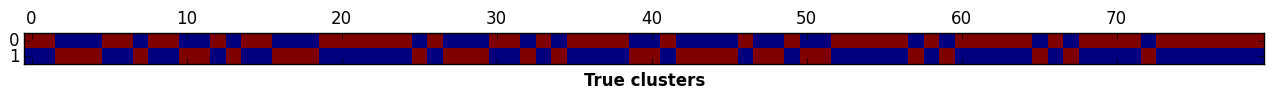

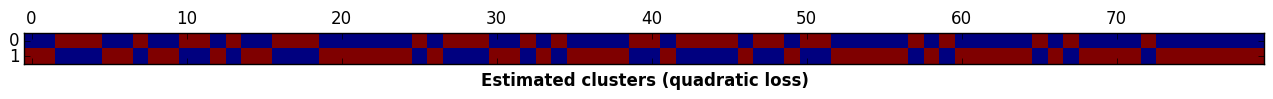

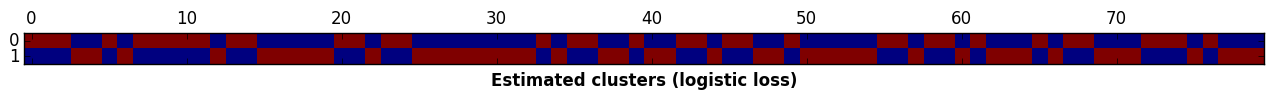

PyObject <matplotlib.text.Text object at 0x7fd34e6b4410>

In [5]:
matshow(x_')
xlabel("True clusters",fontweight="bold")

matshow(Xquad')
xlabel("Estimated clusters (quadratic loss)",fontweight="bold")

matshow(Xlog')
xlabel("Estimated clusters (logistic loss)",fontweight="bold")